In [1]:
import numpy as np
import pandas as pd 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#LOADING DATA
df=pd.read_csv('Worldgdpdata1.csv')

In [3]:
#Looking at the first few rows of data.
df.head()

,"GDP, current prices (Billions of U.S. dollars)",2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,4.367,4.553,5.146,6.167,6.925,8.556,10.297,12.066,15.325,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,14.270,16.140,15.980
1,Albania,4.348,5.611,7.185,8.052,8.896,10.677,12.881,12.044,11.937,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,56.761,67.864,85.332,103.198,117.027,134.977,171.001,137.211,161.207,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,1.758,2.362,2.896,3.158,3.456,3.952,4.082,3.675,3.446,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,15.286,17.813,23.552,36.971,52.381,65.266,88.539,70.307,83.799,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558


In [4]:
#Getting info about each column and its data type and number of null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 23 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GDP, current prices (Billions of U.S. dollars)  197 non-null    object 
 1   2002                                            196 non-null    float64
 2   2003                                            196 non-null    float64
 3   2004                                            196 non-null    float64
 4   2005                                            196 non-null    float64
 5   2006                                            196 non-null    float64
 6   2007                                            196 non-null    float64
 7   2008                                            196 non-null    float64
 8   2009                                            196 non-null    float64
 9   2010                                       

In [5]:
#Looking at statistical measures of each variable
df.describe()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,178.140362,200.052046,225.175383,243.935577,264.200332,298.275046,327.359556,310.112842,339.206755,376.395286,...,405.250082,382.369679,388.832944,413.449760,439.845041,447.216026,435.921781,495.368786,518.309714,541.246495
std,872.230644,929.482188,1002.718107,1061.196109,1118.750707,1191.235924,1247.277649,1224.436112,1297.077696,1392.482068,...,1572.575493,1602.925694,1642.988598,1731.343695,1855.248794,1920.720806,1907.553151,2153.306364,2284.250982,2391.750931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.987500,2.472250,2.939500,3.172250,3.814500,4.382750,5.196250,5.016750,6.002000,6.717250,...,8.453250,7.824250,6.948750,7.661000,8.173750,8.729250,8.492500,9.686000,10.064000,10.480750
50%,9.579000,10.794500,12.654000,14.412000,17.256000,21.473500,25.313000,24.322500,26.320000,28.258500,...,34.649500,32.727000,33.020000,35.780000,37.373500,37.983000,34.068000,38.018000,39.821000,41.830500
75%,68.277250,77.982250,87.749500,104.254000,115.939500,140.789500,173.132250,145.798250,162.482500,194.474500,...,216.505750,189.031000,193.687000,212.692250,230.460250,235.255000,214.971500,247.744250,262.243250,264.360000
max,10929.100000,11456.450000,12217.175000,13039.200000,13815.600000,14474.250000,14769.850000,14478.050000,15048.975000,15599.725000,...,17550.675000,18206.025000,18695.100000,19479.625000,20527.150000,21372.600000,20893.750000,22996.075000,25035.164000,26185.210000


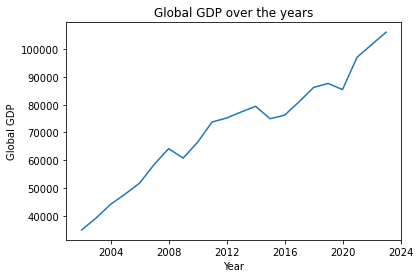

In [6]:
#Finding Annual Global GDP and studying growth trajectory
globalgdp=df.sum(numeric_only=True)
x=df.columns.to_numpy()
x=x[1:]
x=pd.to_datetime(x)
plt.plot(x,globalgdp)
plt.xlabel("Year")
plt.ylabel("Global GDP")
plt.title("Global GDP over the years");

In [7]:
#Finding South America's GDP
south_america = ['Chile','Brazil','Argentina','Peru','Bolivia','Uruguay','Paraguay','Ecuador','Colombia','Venezuela']

south_america_gdp = df[df['GDP, current prices (Billions of U.S. dollars)'].isin(south_america)]
south_america_gdp_annual=south_america_gdp.sum(numeric_only=True)

In [8]:
#Finding Asia's GDP
asia=['Russian Federation','China, People\'s Republic of','India','Kazakhstan','Saudi Arabia','Iran','Mongolia',
'Indonesia','Pakistan','Türkiye, Republic of','Myanmar','Afghanistan','Yemen','Thailand','Turkmenistan','Uzbekistan','Iraq','Japan',
'Vietnam','Malaysia','Oman','Philippines','Lao P.D.R.','Kyrgyz Republic','Syria','Cambodia','Bangladesh','Nepal','Tajikistan',
'Korea, Republic of','Jordan','United Arab Emirates','Azerbaijan','Georgia','Sri Lanka','Egypt','Bhutan','Taiwan Province of China',
'Armenia','Israel','Kuwait','East Timor','Qatar','Lebanon','Cyprus','Palestine','Brunei Darussalam']

asia_gdp =df[df['GDP, current prices (Billions of U.S. dollars)'].isin(asia)]
asia_gdp_annual=asia_gdp.sum(numeric_only=True)

In [9]:
#Finding North America's GDP
north_america = ['United States','Mexico','Canada','Guatemala','Haiti','Dominican Republic','Honduras','Nicaragua',
'El Salvador','Costa Rica','Panama','Puerto Rico','Jamaica','Trinidad and Tobago','Bahamas, The','Belize','Barbados',
'Saint Lucia','Grenada','Aruba','Saint Vincent and the Grenadines','Antigua and Barbuda',
'Dominica']

north_america_gdp = df[df['GDP, current prices (Billions of U.S. dollars)'].isin(north_america)]
north_america_gdp_annual=north_america_gdp.sum(numeric_only=True)

In [10]:
#Finding Australia's GDP
australia=['Australia','Papua New Guinea','New Zealand','Fiji','Solomon Islands','Micronesia','Vanuatu','Tuvalu','Nauru',
'Samoa','Kiribati','Tonga','Marshall Islands','Palau']

australia_gdp=df[df['GDP, current prices (Billions of U.S. dollars)'].isin(australia)]
australia_gdp_annual=australia_gdp.sum(numeric_only=True)


In [11]:
#Finding Africa's GDP
africa=['Nigeria','Ethiopia','Egypt','DR Congo','Tanzania','South Africa','Kenya','Uganda','Sudan','Algeria','Morocco',
'Angola','Ghana','Mozambique','Madagascar','Cameroon','Niger','Mali','Burkina Faso','Malawi','Zambia','Chad','Somalia',
'Senegal','Zimbabwe','Guinea','Rwanda',' Benin','Burundi','Tunisia','South Sudan','Togo','Sierra Leone','Libya',
'Congo, Dem. Rep. of the','Central African Republic','Liberia','Mauritania','Eritrea','Gambia, The','Botswana','Namibia',
'Gabon','Lesotho','Guinea-Bissau','Equatorial Guinea','Mauritius','Eswatini','Djibouti','Comoros','Seychelles']

africa_gdp=df[df['GDP, current prices (Billions of U.S. dollars)'].isin(africa)]
africa_gdp_annual=africa_gdp.sum(numeric_only=True)

In [12]:
#Finding Europe's GDP
europe=['Germany','United Kingdom','France','Italy','Spain','Poland','Ukraine','Romania','Netherlands','Belgium','Sweden',
'Czech Republic','Greece','Portugal','Hungary','Belarus','Austria','Switzerland','Serbia','Bulgaria','Denmark',
'Slovak Republic','Finland','Norway','Ireland','Croatia','Moldova','Bosnia and Herzegovina','Albania','Lithuania','Slovenia',
'North Macedonia','Latvia','Estonia','Luxembourg','Montenegro','Malta','Iceland','Andorra','San Marino']

europe_gdp=df[df['GDP, current prices (Billions of U.S. dollars)'].isin(europe)]
europe_gdp_annual=europe_gdp.sum(numeric_only=True)

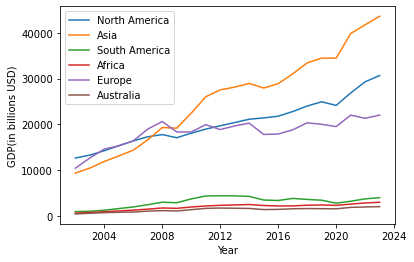

In [13]:
#Representation of the growth trajectory of all continents using time series analysis
plt.plot(x,north_america_gdp_annual)
plt.plot(x,asia_gdp_annual)
plt.plot(x,south_america_gdp_annual)
plt.plot(x,africa_gdp_annual)
plt.plot(x,europe_gdp_annual)
plt.plot(x,australia_gdp_annual)
plt.xlabel("Year")
plt.ylabel("GDP(in billions USD)")
plt.legend(["North America", "Asia", "South America", "Africa", "Europe", "Australia"], loc="upper left");

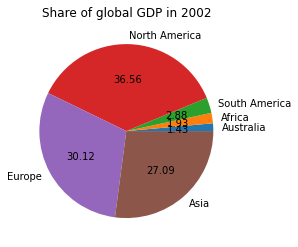

In [14]:
#Continents share of global GDP in 2002
aus2002=australia_gdp_annual.loc[['2002']]
afr2002=africa_gdp_annual.loc[['2002']]
sa2002=south_america_gdp_annual.loc[['2002']]
na2002=north_america_gdp_annual.loc[['2002']]
eur2002=europe_gdp_annual.loc[['2002']]
asi2002=asia_gdp_annual.loc[['2002']]
global2002=globalgdp.loc[['2002']]
a=np.array([aus2002[0],afr2002[0],sa2002[0],na2002[0],eur2002[0],asi2002[0]])
continents=["Australia","Africa","South America","North America","Europe","Asia"]
plt.pie(a,labels=continents,autopct='%.2f')
plt.title("Share of global GDP in 2002")
plt.show;

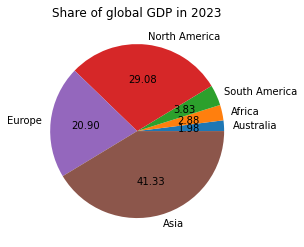

In [15]:
#Continents share of global GDP in 2023
aus2023=australia_gdp_annual.loc[['2023']]
afr2023=africa_gdp_annual.loc[['2023']]
sa2023=south_america_gdp_annual.loc[['2023']]
na2023=north_america_gdp_annual.loc[['2023']]
eur2023=europe_gdp_annual.loc[['2023']]
asi2023=asia_gdp_annual.loc[['2023']]
global2023=globalgdp.loc[['2023']]
a=np.array([aus2023[0],afr2023[0],sa2023[0],na2023[0],eur2023[0],asi2023[0]])
continents=["Australia","Africa","South America","North America","Europe","Asia"]
plt.pie(a,labels=continents,autopct='%.2f');
plt.title("Share of global GDP in 2023")
plt.show;

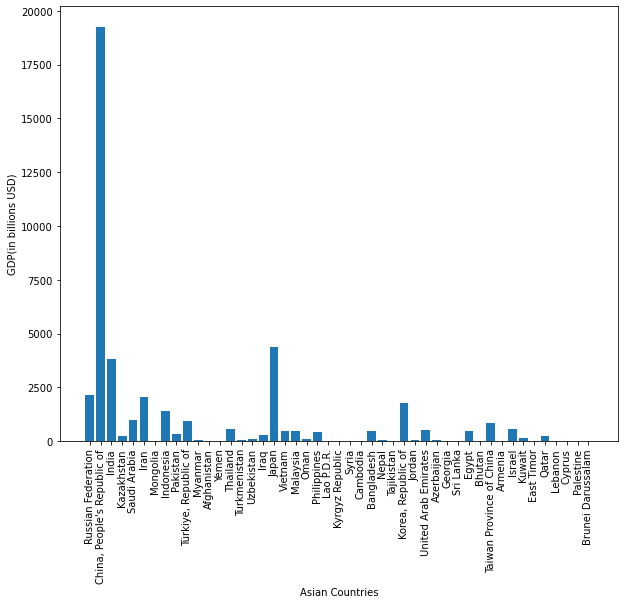

In [16]:
#Clearly Asia has shown impressive growth in the last 33 years. The 3 major economies of Asia are Russia, China and India.
#Therefore further insights can be drawn by looking at the largest contributors to Asia's GDP
countries=[]
gdp2023=[]
a=0
for i in asia:
    countries.append(i)
    gdp_country=df[df['GDP, current prices (Billions of U.S. dollars)']==i]
    annual_gdp_country=gdp_country.sum(numeric_only=True)
    a=int(annual_gdp_country.loc[['2023']].values)
    gdp2023.append(a)
plt.figure(figsize=(10,8))
plt.bar(countries,height=gdp2023);
plt.xlabel("Asian Countries");
plt.ylabel("GDP(in billions USD)");
plt.xticks(countries,rotation='vertical');

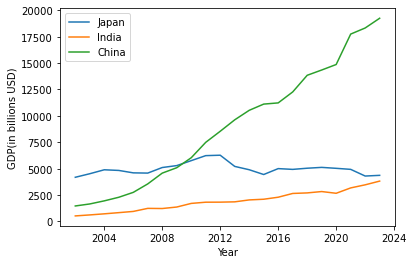

In [17]:
#Clearly China, Japan and India are the largest contributors to Asia's GDP in 2023. Further insights can be drawn from their
#growth trajectories in the last few decades.
jap_gdp=df[df['GDP, current prices (Billions of U.S. dollars)']==("Japan")]
jap_gdp_annual=jap_gdp.sum(numeric_only=True)

ind_gdp=df[df['GDP, current prices (Billions of U.S. dollars)']=="India"]
ind_gdp_annual=ind_gdp.sum(numeric_only=True)

china_gdp=df[df['GDP, current prices (Billions of U.S. dollars)']=="China, People's Republic of"]
china_gdp_annual=china_gdp.sum(numeric_only=True)

plt.plot(x,jap_gdp_annual)
plt.plot(x,ind_gdp_annual)
plt.plot(x,china_gdp_annual)

plt.xlabel("Year")
plt.ylabel("GDP(in billions USD)")
plt.legend(["Japan", "India", "China"]);

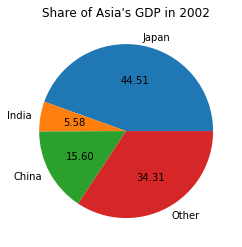

In [18]:
#Russia, China and India's shares of the Asian economy in 2002
jap2002=jap_gdp_annual.loc[['2002']]
ind2002=ind_gdp_annual.loc[['2002']]
china2002=china_gdp_annual.loc[['2002']]
other_asian_countries_2002=asi2002-(china2002+ind2002+jap2002)

a=np.array([jap2002[0],ind2002[0],china2002[0],other_asian_countries_2002[0]])
asiancountries=["Japan", "India", "China","Other"]
plt.pie(a,labels=asiancountries,autopct='%.2f')
plt.title("Share of Asia's GDP in 2002");

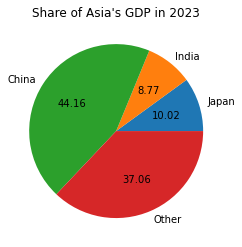

In [19]:
#Russia, China and Japan's shares of the Asian economy in 2023
jap2023=jap_gdp_annual.loc[['2023']]
ind2023=ind_gdp_annual.loc[['2023']]
china2023=china_gdp_annual.loc[['2023']]
other_asian_countries_2023=asi2023-(china2023+ind2023+jap2023)

a=np.array([jap2023[0],ind2023[0],china2023[0],other_asian_countries_2023[0]])
asiancountries=["Japan", "India", "China","Other"]
plt.pie(a,labels=asiancountries,autopct='%.2f')
plt.title("Share of Asia's GDP in 2023");

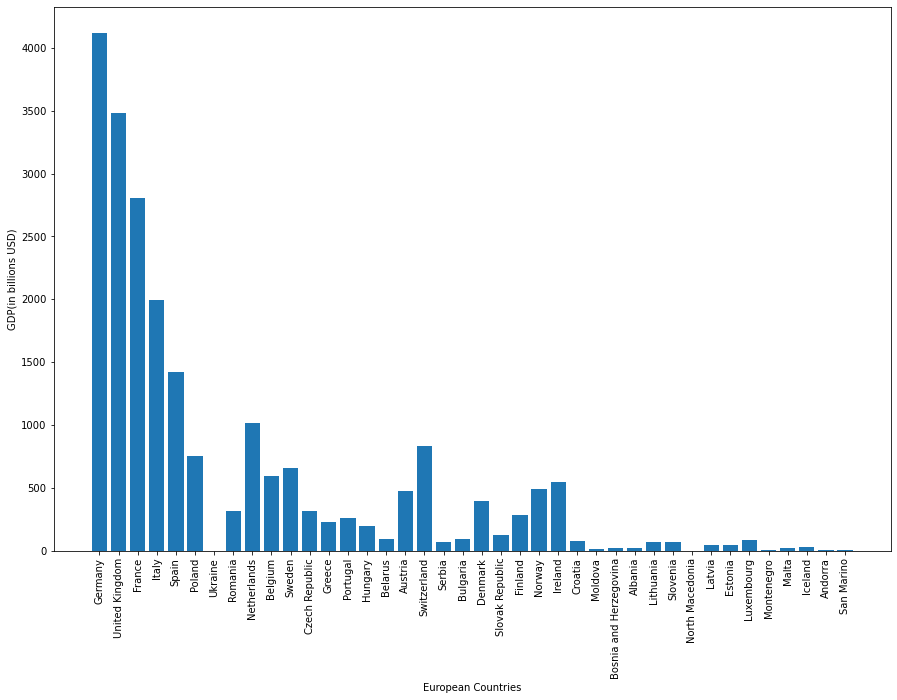

In [20]:
#Clearly Europe's share of world GDP has shrunk and has largely been taken over by Asia. Studying the gdp of european countries
#in 2023 can provide a better understanding of the European economy
countries=[]
gdp2023=[]
a=0
for i in europe:
    countries.append(i)
    gdp_country=df[df['GDP, current prices (Billions of U.S. dollars)']==i]
    annual_gdp_country=gdp_country.sum(numeric_only=True)
    a=int(annual_gdp_country.loc[['2023']].values)
    gdp2023.append(a)
plt.figure(figsize=(15,10))
plt.bar(countries,height=gdp2023);
plt.xlabel("European Countries");
plt.ylabel("GDP(in billions USD)");
plt.xticks(countries,rotation='vertical');

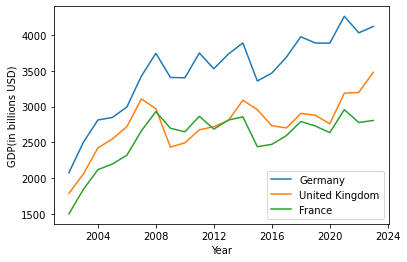

In [22]:
#Studying growth trajectories of Europe's top economies over the last 20 years can provide deeper insights.
ger_gdp=df[df['GDP, current prices (Billions of U.S. dollars)']==("Germany")]
ger_gdp_annual=ger_gdp.sum(numeric_only=True)

uk_gdp=df[df['GDP, current prices (Billions of U.S. dollars)']=="United Kingdom"]
uk_gdp_annual=uk_gdp.sum(numeric_only=True)

fra_gdp=df[df['GDP, current prices (Billions of U.S. dollars)']=="France"]
fra_gdp_annual=fra_gdp.sum(numeric_only=True)

plt.plot(x,ger_gdp_annual)
plt.plot(x,uk_gdp_annual)
plt.plot(x,fra_gdp_annual)

plt.xlabel("Year")
plt.ylabel("GDP(in billions USD)")
plt.legend(["Germany", "United Kingdom", "France"]);

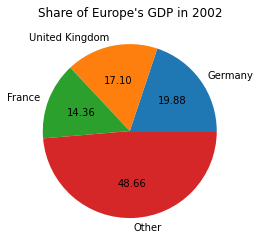

In [23]:
#Germany, United Kingdom and France's shares of the European economy in 2002
ger2002=ger_gdp_annual.loc[['2002']]
uk2002=uk_gdp_annual.loc[['2002']]
fra2002=fra_gdp_annual.loc[['2002']]
other_european_countries_2002=eur2002-(fra2002+uk2002+ger2002)

a=np.array([ger2002[0],uk2002[0],fra2002[0],other_european_countries_2002[0]])
europeanncountries=["Germany", "United Kingdom", "France","Other"]
plt.pie(a,labels=europeanncountries,autopct='%.2f')
plt.title("Share of Europe's GDP in 2002");

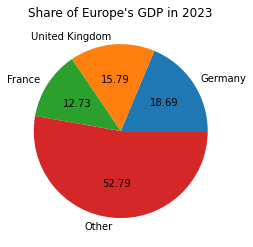

In [24]:
#Germany, United Kingdom and France's shares of the European economy in 2023
ger2023=ger_gdp_annual.loc[['2023']]
uk2023=uk_gdp_annual.loc[['2023']]
fra2023=fra_gdp_annual.loc[['2023']]
other_european_countries_2023=eur2023-(fra2023+uk2023+ger2023)

a=np.array([ger2023[0],uk2023[0],fra2023[0],other_european_countries_2023[0]])
europeanncountries=["Germany", "United Kingdom", "France","Other"]
plt.pie(a,labels=europeanncountries,autopct='%.2f')
plt.title("Share of Europe's GDP in 2023");

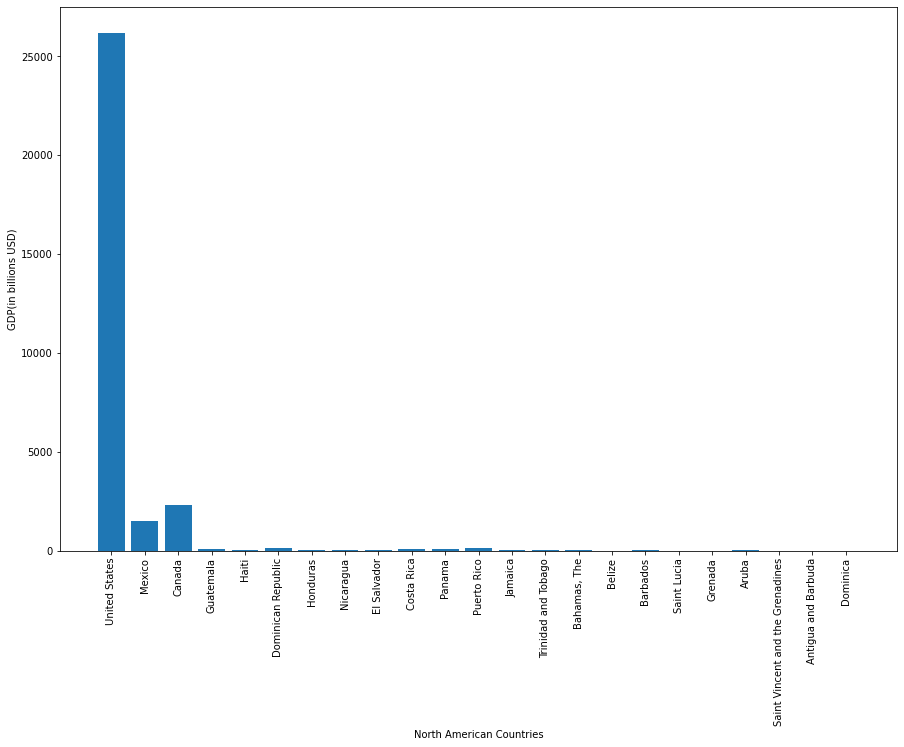

In [25]:
#Clearly North America's share of world GDP has shrunk. Studying the gdp of North American countries in 2023 can provide a 
#better understanding of the North American economy
countries=[]
gdp2023=[]
a=0
for i in north_america:
    countries.append(i)
    gdp_country=df[df['GDP, current prices (Billions of U.S. dollars)']==i]
    annual_gdp_country=gdp_country.sum(numeric_only=True)
    a=int(annual_gdp_country.loc[['2023']].values)
    gdp2023.append(a)
plt.figure(figsize=(15,10))
plt.bar(countries,height=gdp2023);
plt.xlabel("North American Countries");
plt.ylabel("GDP(in billions USD)");
plt.xticks(countries,rotation='vertical');

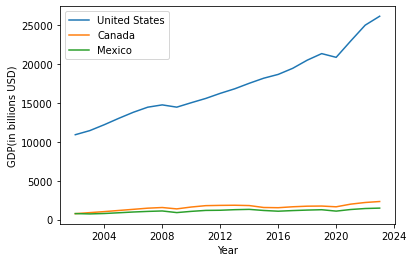

In [26]:
#Studying growth trajectories of North America's top economies over the last 20 years can provide deeper insights.
usa_gdp=df[df['GDP, current prices (Billions of U.S. dollars)']==("United States")]
usa_gdp_annual=usa_gdp.sum(numeric_only=True)

can_gdp=df[df['GDP, current prices (Billions of U.S. dollars)']=="Canada"]
can_gdp_annual=can_gdp.sum(numeric_only=True)

mex_gdp=df[df['GDP, current prices (Billions of U.S. dollars)']=="Mexico"]
mex_gdp_annual=mex_gdp.sum(numeric_only=True)

plt.plot(x,usa_gdp_annual)
plt.plot(x,can_gdp_annual)
plt.plot(x,mex_gdp_annual)

plt.xlabel("Year")
plt.ylabel("GDP(in billions USD)")
plt.legend(["United States", "Canada", "Mexico"]);

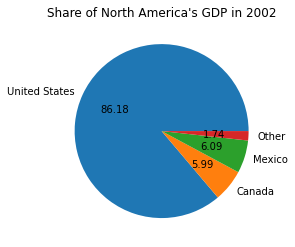

In [27]:
usa2002=usa_gdp_annual.loc[['2002']]
can2002=can_gdp_annual.loc[['2002']]
mex2002=mex_gdp_annual.loc[['2002']]
other_northamerican_countries_2002=na2002-(mex2002+can2002+usa2002)

a=np.array([usa2002[0],can2002[0],mex2002[0],other_northamerican_countries_2002[0]])
namericancountries=["United States", "Canada", "Mexico","Other"]
plt.pie(a,labels=namericancountries,autopct='%.2f')
plt.title("Share of North America's GDP in 2002");

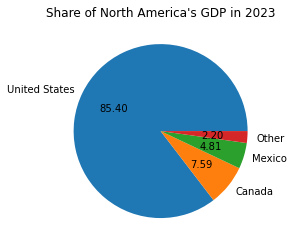

In [28]:
usa2023=usa_gdp_annual.loc[['2023']]
can2023=can_gdp_annual.loc[['2023']]
mex2023=mex_gdp_annual.loc[['2023']]
other_northamerican_countries_2023=na2023-(mex2023+can2023+usa2023)

a=np.array([usa2023[0],can2023[0],mex2023[0],other_northamerican_countries_2023[0]])
namericancountries=["United States", "Canada", "Mexico","Other"]
plt.pie(a,labels=namericancountries,autopct='%.2f')
plt.title("Share of North America's GDP in 2023");